In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
cwd = os.getcwd()

In [3]:
os.chdir(cwd)

In [4]:
df = pd.read_excel("CreditCard.xls")
df.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

In [5]:
df.shape

(30001, 25)

In [6]:
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df.head()


0 ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
1  1     20000   2         2        1  24     2     2    -1    -1  ...   
2  2    120000   2         2        2  26    -1     2     0     0  ...   
3  3     90000   2         2        2  34     0     0     0     0  ...   
4  4     50000   2         2        1  37     0     0     0     0  ...   
5  5     50000   1         2        1  57    -1     0    -1     0  ...   

0 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
1         0         0         0        0      689        0        0        0   
2      3272      3455      3261        0     1000     1000     1000        0   
3     14331     14948     15549     1518     1500     1000     1000     1000   
4     28314     28959     29547     2000     2019     1200     1100     1069   
5     20940     19146     19131     2000    36681    10000     9000      689   

0 PAY_AMT6 default payment next month  
1        0                          1  
2     2000                          1  
3     5000                          0  
4     1000                          0  
5      679                          0  

[5 rows x 25 columns]

In [7]:
df.isna().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [9]:
df.EDUCATION.shape

(30000,)

In [10]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=object)

In [11]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
g = len(df[df["EDUCATION"].map(lambda x : x==2)])
g

14030

In [13]:
k = df.shape[0]
k

30000

In [14]:
print(f"Percent of defaulters who were university graduates {(g/k)*100}")


Percent of defaulters who were university graduates 46.766666666666666


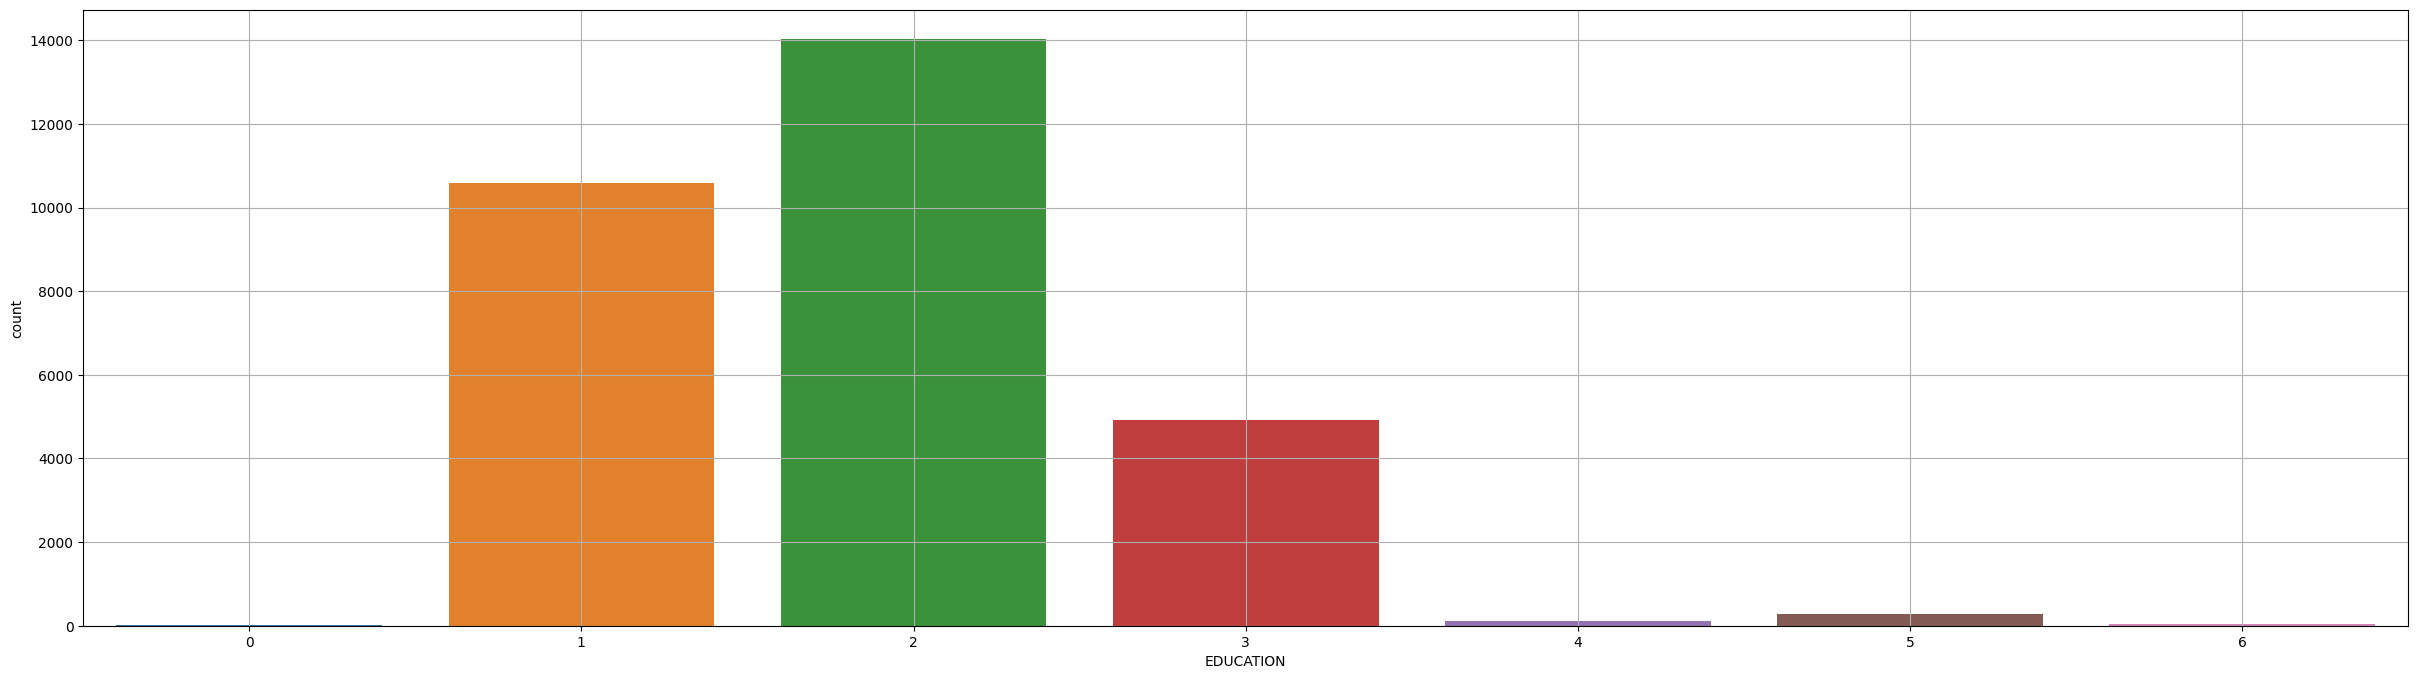

In [15]:
# Count plot for the 'EDUCATION' column using the 'countplot()' function of 'seaborn' module.
plt.figure(figsize=(30,8))
sns.countplot(x='EDUCATION',data=df)
plt.grid() 
plt.show()

In [16]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
df["MARRIAGE"].replace((0),3 , inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [18]:
m=len(df[df["MARRIAGE"].map(lambda x:x==1)])
print(f"{(m/k)*100} percent of clients were married")

45.53 percent of clients were married


In [19]:
df[["MARRIAGE"]].value_counts().to_frame("Count")

Count
MARRIAGE       
2         15964
1         13659
3           377

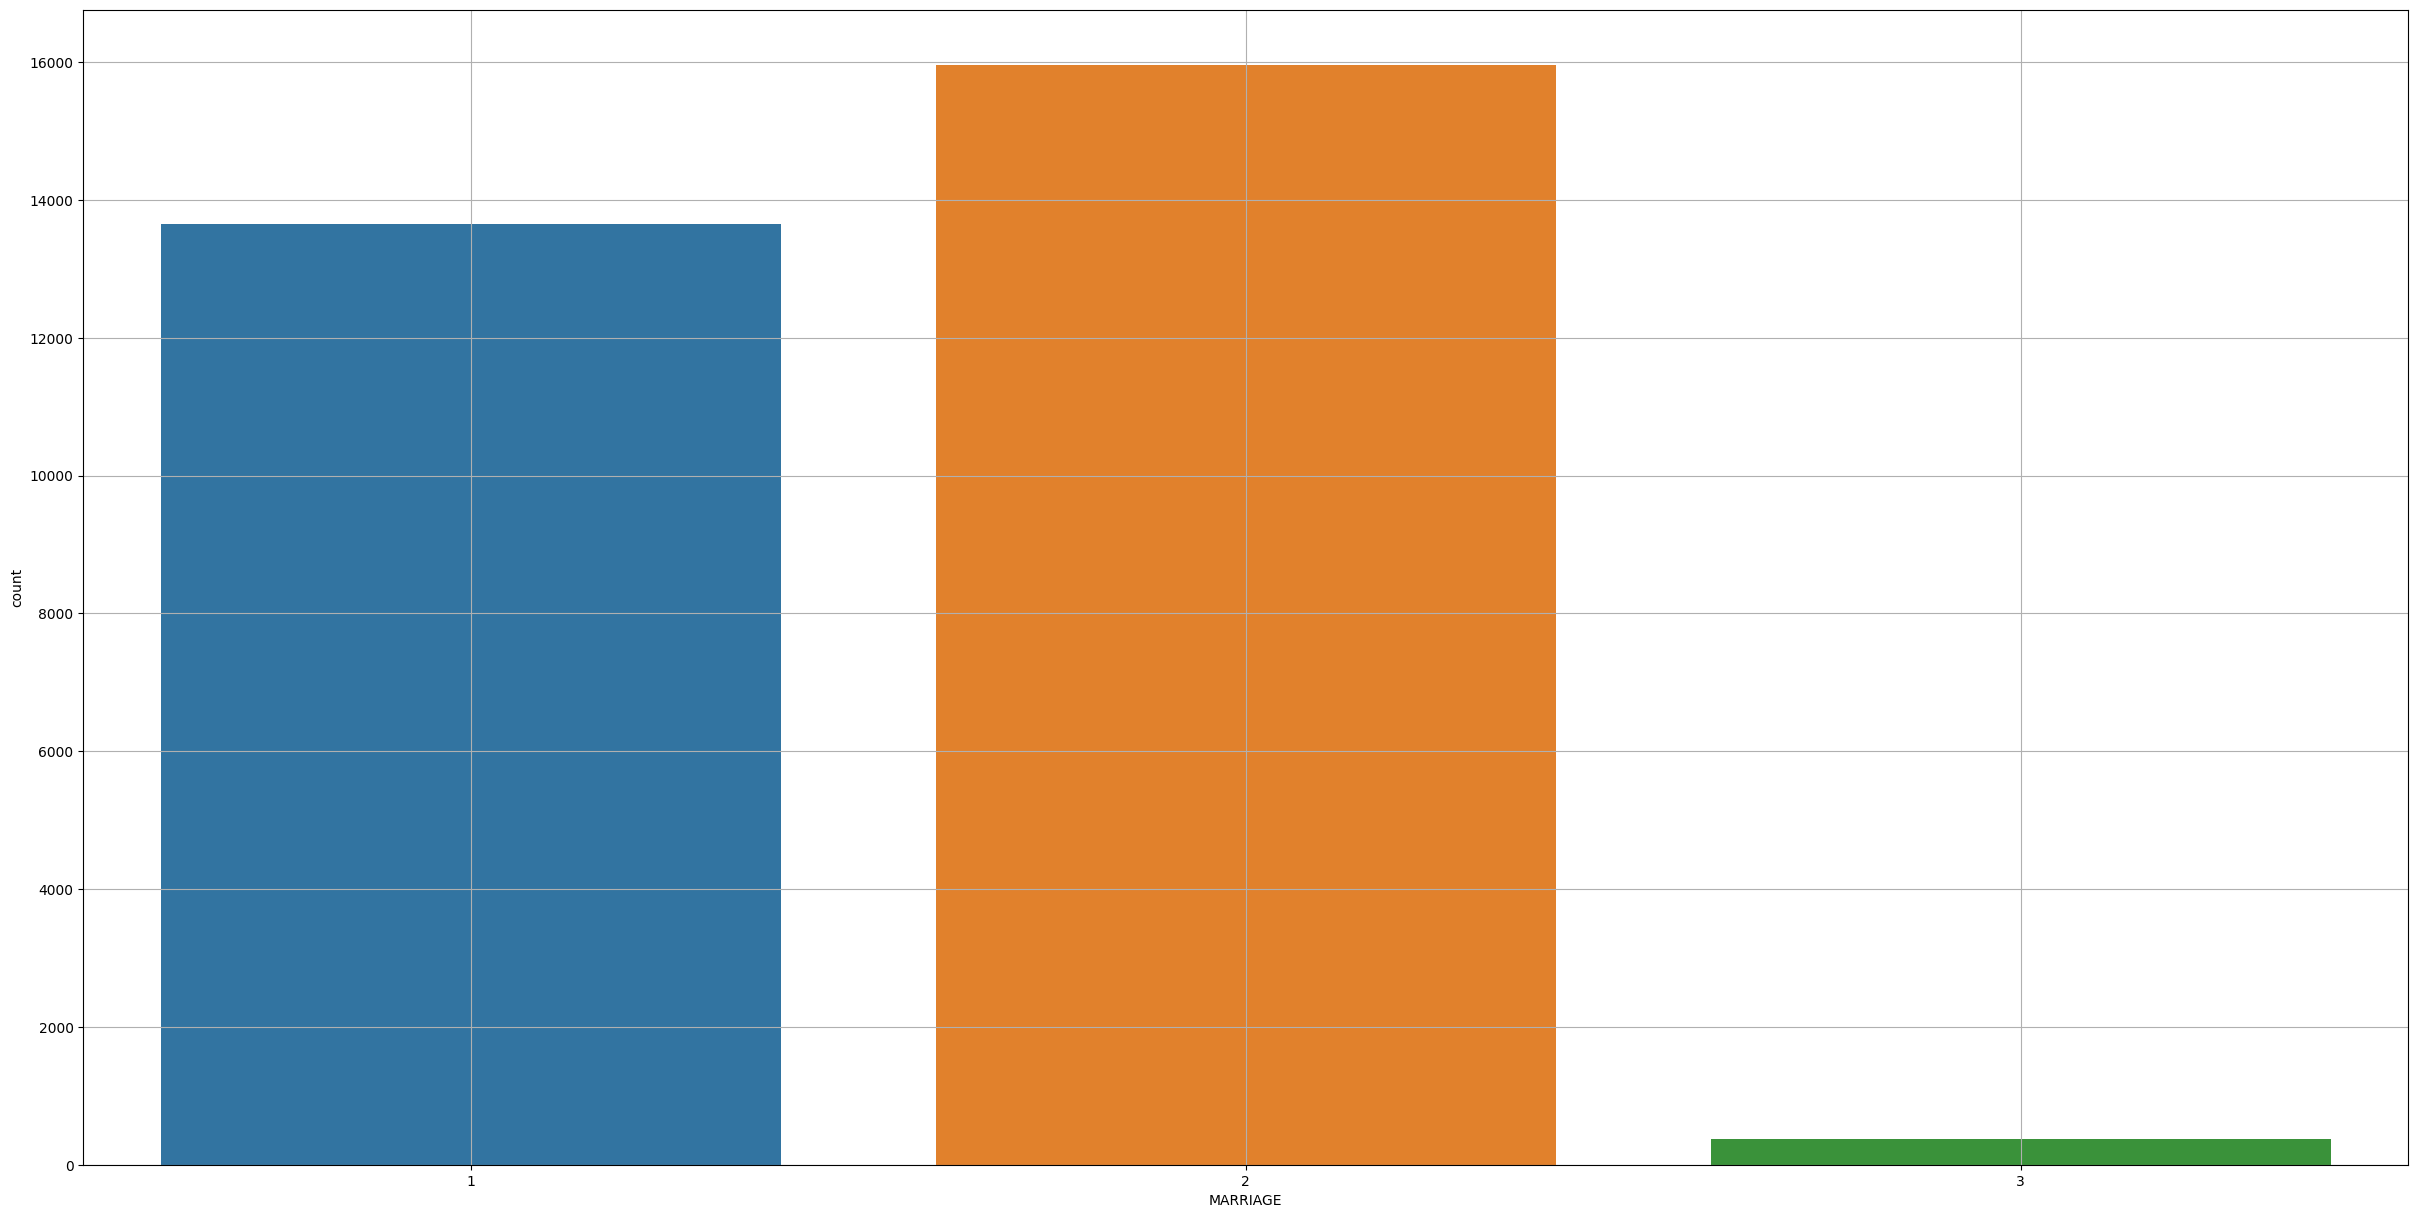

In [20]:
plt.figure(figsize=(30,15))
sns.countplot(x="MARRIAGE", data=df)
plt.grid()
plt.show()

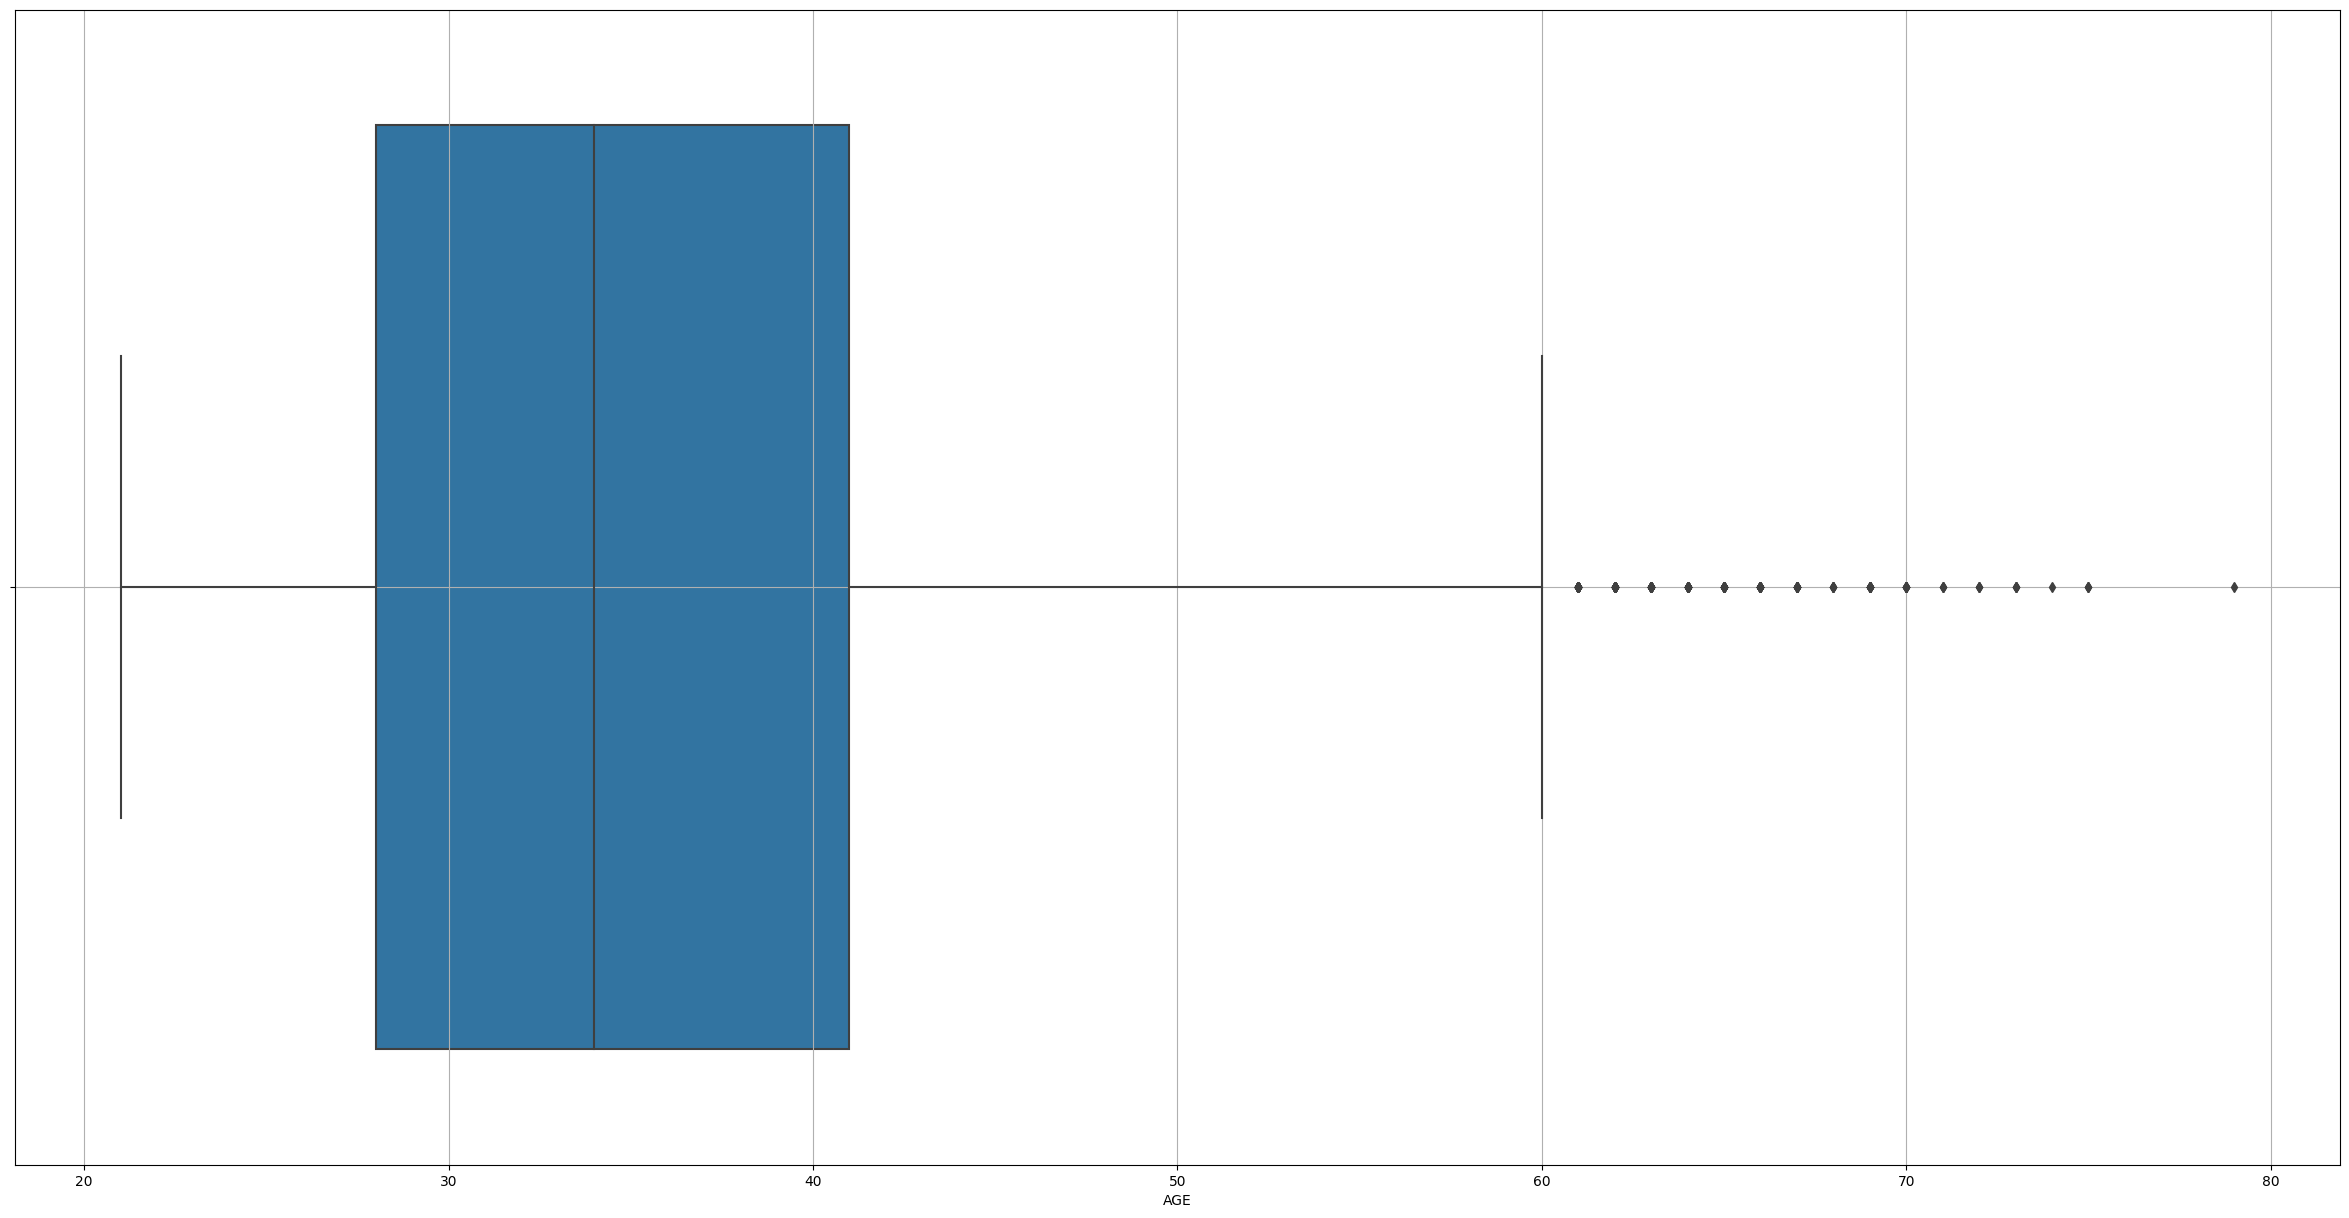

In [21]:
plt.figure(figsize=(30,15))
sns.boxplot(x="AGE", data=df)
plt.grid()

<Figure size 3000x1500 with 0 Axes>

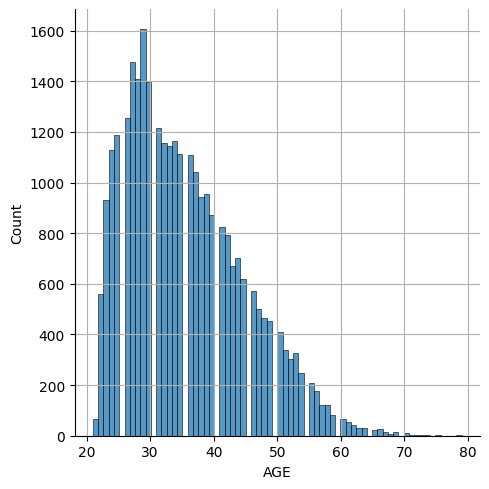

In [22]:
plt.figure(figsize=(30,15))
sns.displot(df["AGE"])
plt.grid()
plt.show()

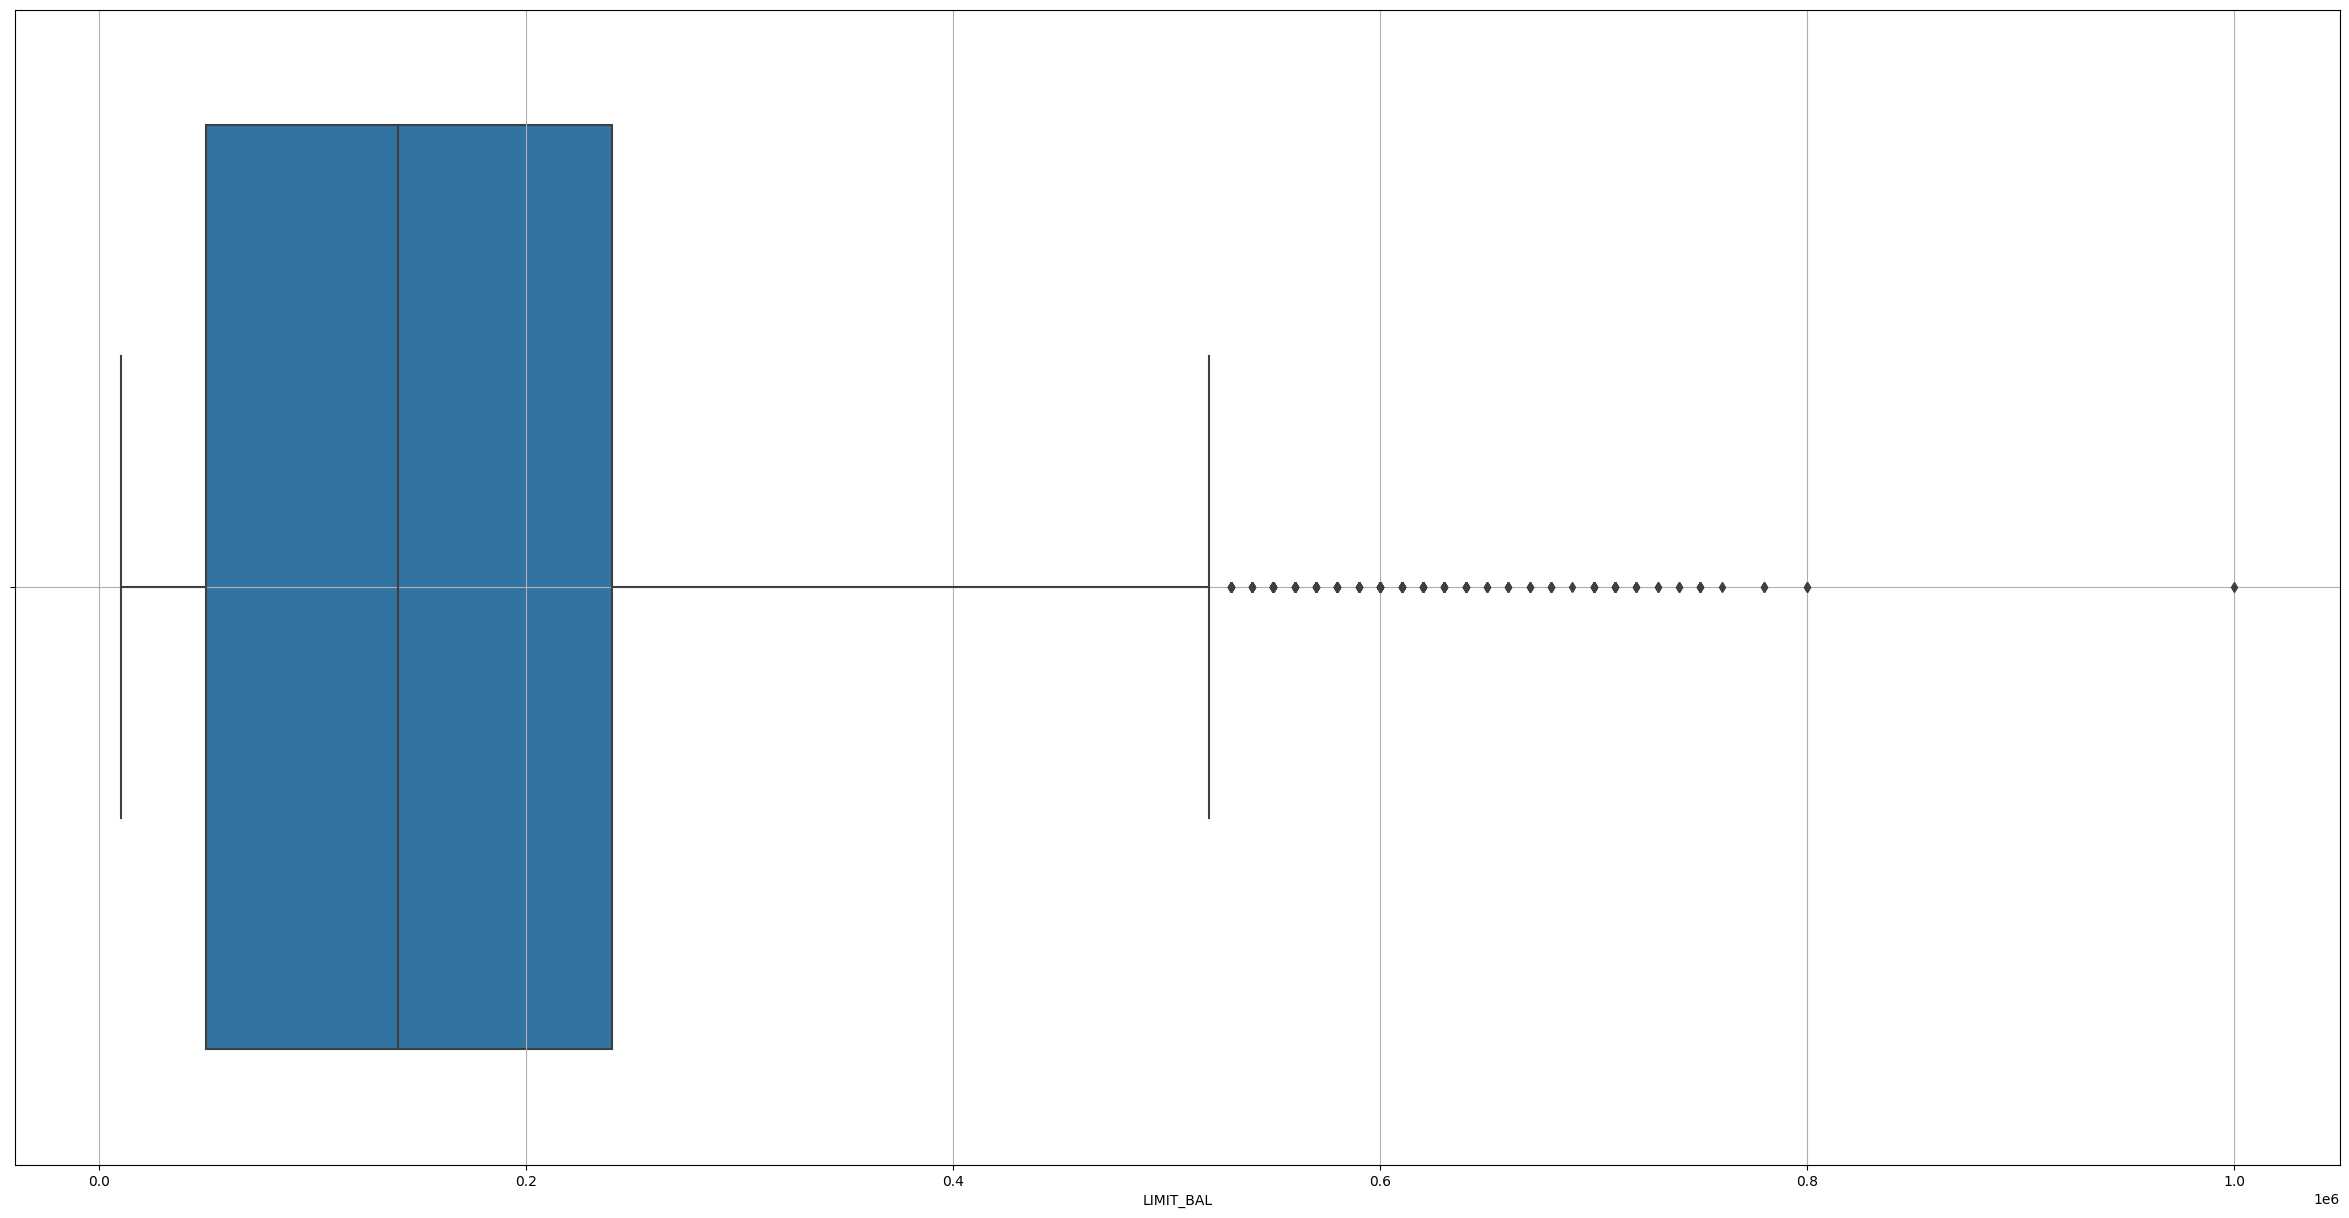

In [23]:
plt.figure(figsize=(30,15))
sns.boxplot(x="LIMIT_BAL", data=df)
plt.grid()

<Figure size 3000x1500 with 0 Axes>

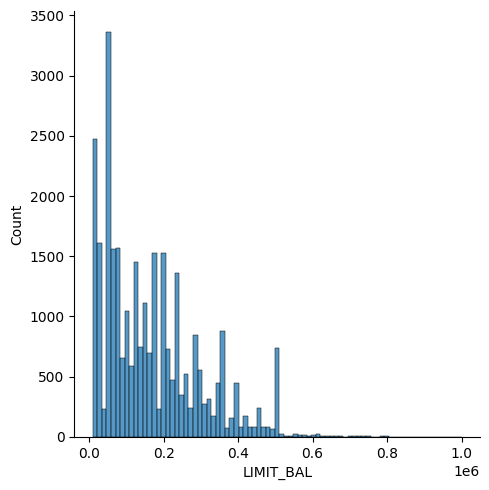

In [24]:
plt.figure(figsize=(30,15))
sns.displot(df["LIMIT_BAL"])
plt.show()

In [25]:
f=df[['SEX']].value_counts().to_frame("number of users")
f

number of users
SEX                 
2              18112
1              11888

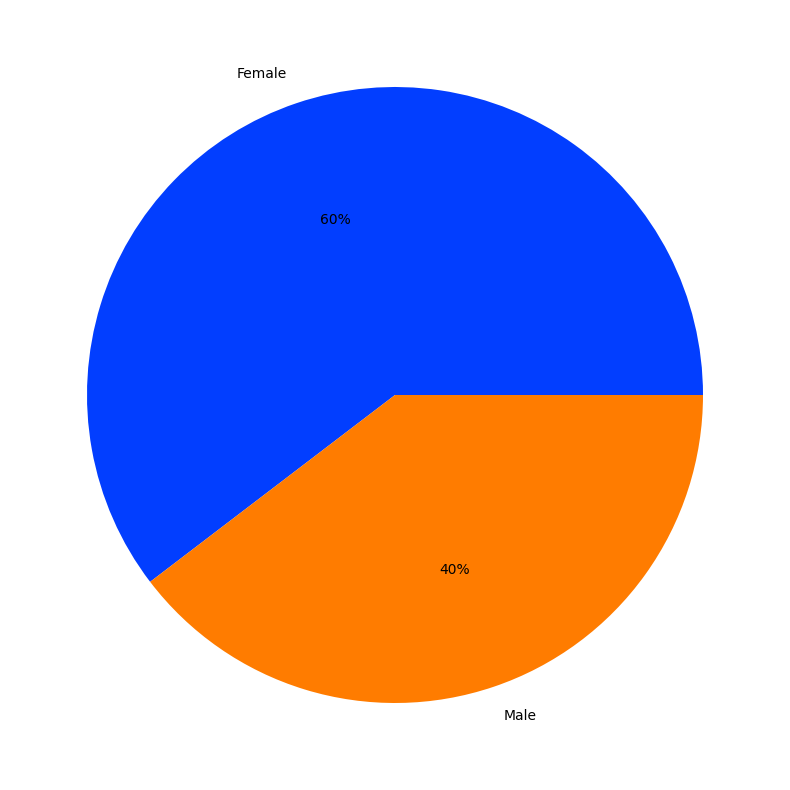

In [26]:
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('bright')
keys = ["Female", "Male"]
plt.pie(df["SEX"].value_counts(), labels=keys, colors=palette_color, autopct="%.0f%%");

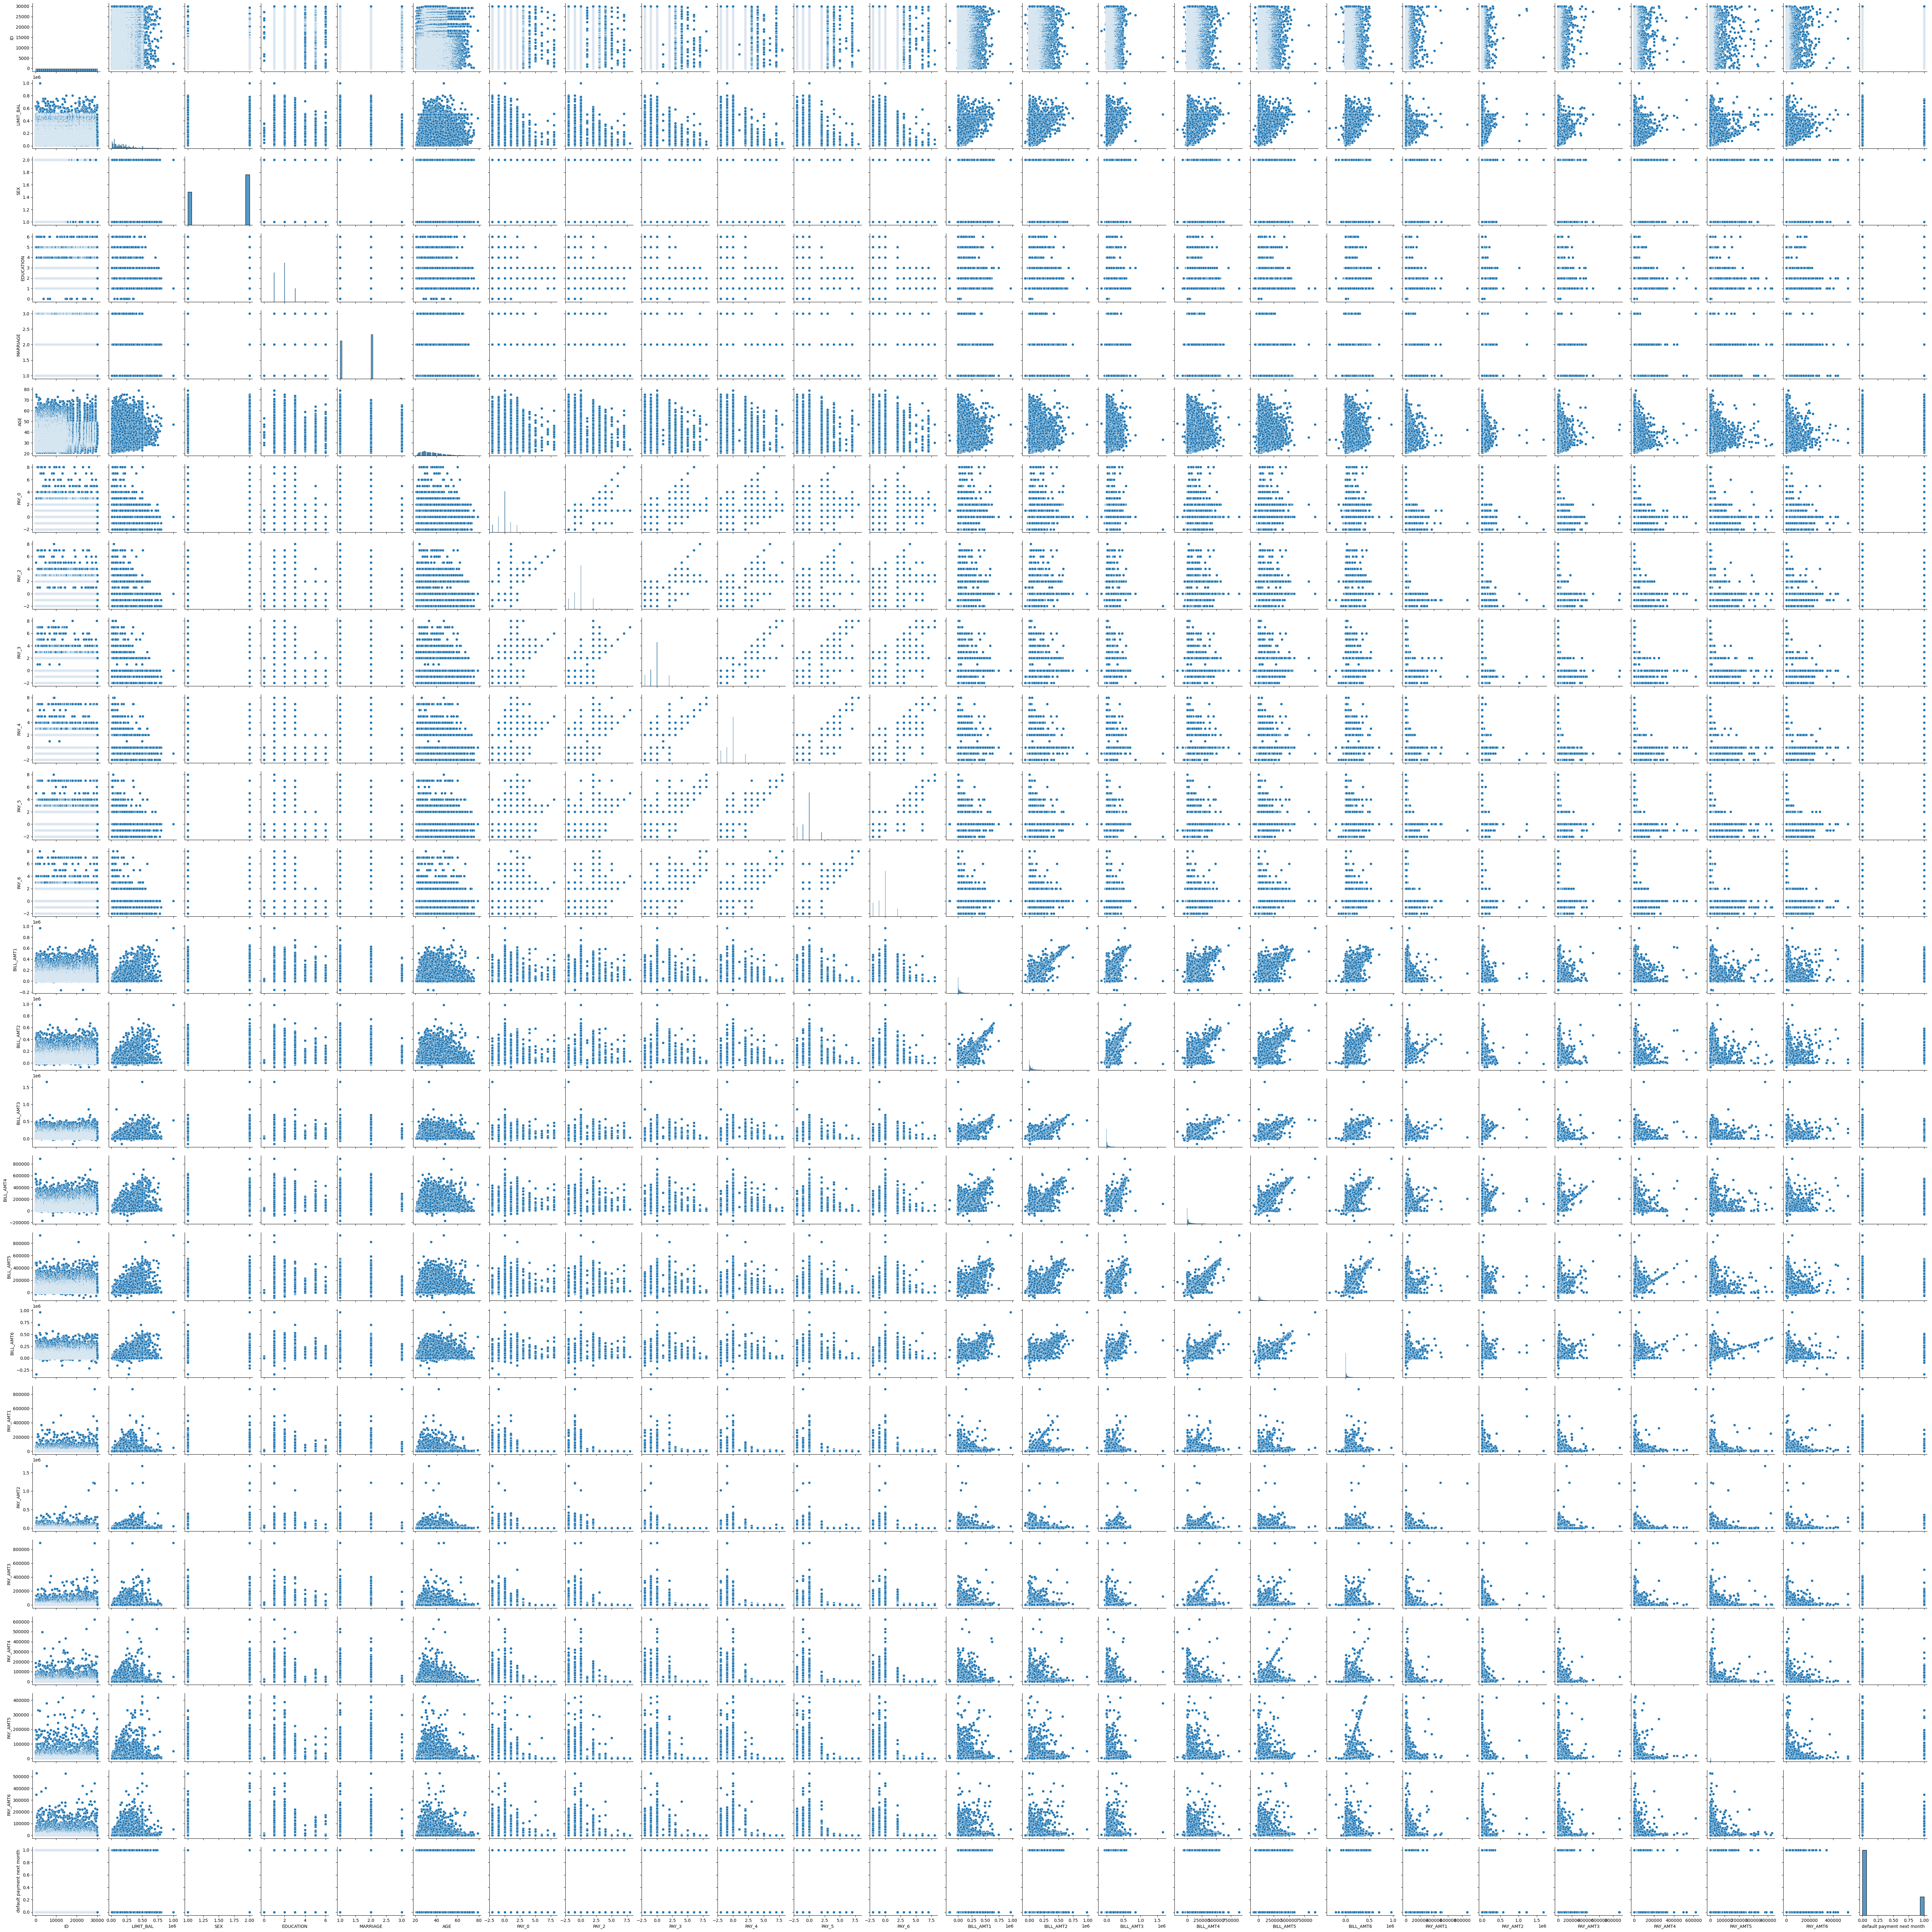

In [27]:
sns.pairplot(df)

In [28]:
x = df.drop("default payment next month", axis=1)
y=df["default payment next month"]


In [29]:
x

0         ID LIMIT_BAL SEX EDUCATION  MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
1          1     20000   2         2         1  24     2     2    -1    -1   
2          2    120000   2         2         2  26    -1     2     0     0   
3          3     90000   2         2         2  34     0     0     0     0   
4          4     50000   2         2         1  37     0     0     0     0   
5          5     50000   1         2         1  57    -1     0    -1     0   
...      ...       ...  ..       ...       ...  ..   ...   ...   ...   ...   
29996  29996    220000   1         3         1  39     0     0     0     0   
29997  29997    150000   1         3         2  43    -1    -1    -1    -1   
29998  29998     30000   1         2         2  37     4     3     2    -1   
29999  29999     80000   1         3         1  41     1    -1     0     0   
30000  30000     50000   1         2         1  46     0     0     0     0   

0      ... BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
1      ...       689         0         0         0        0      689        0   
2      ...      2682      3272      3455      3261        0     1000     1000   
3      ...     13559     14331     14948     15549     1518     1500     1000   
4      ...     49291     28314     28959     29547     2000     2019     1200   
5      ...     35835     20940     19146     19131     2000    36681    10000   
...    ...       ...       ...       ...       ...      ...      ...      ...   
29996  ...    208365     88004     31237     15980     8500    20000     5003   
29997  ...      3502      8979      5190         0     1837     3526     8998   
29998  ...      2758     20878     20582     19357        0        0    22000   
29999  ...     76304     52774     11855     48944    85900     3409     1178   
30000  ...     49764     36535     32428     15313     2078     1800     1430   

0     PAY_AMT4 PAY_AMT5 PAY_AMT6  
1            0        0        0  
2         1000        0     2000  
3         1000     1000     5000  
4         1100     1069     1000  
5         9000      689      679  
...        ...      ...      ...  
29996     3047     5000     1000  
29997      129        0        0  
29998     4200     2000     3100  
29999     1926    52964     1804  
30000     1000     1000     1000  

[30000 rows x 24 columns]

In [30]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 30000, dtype: object

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

In [32]:
x_train, y_train

(0         ID LIMIT_BAL SEX EDUCATION  MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
 28063  28063    400000   2         1         2  36    -1    -1    -1    -1   
 15292  15292     50000   2         2         1  37     0     0     0     0   
 11158  11158     40000   1         2         2  31     0     0     0     0   
 8555    8555    270000   1         2         1  49    -1    -1     0     0   
 29233  29233     50000   1         2         2  24     0     0     0     0   
 ...      ...       ...  ..       ...       ...  ..   ...   ...   ...   ...   
 9530    9530    370000   2         2         2  39     0     0     0     0   
 407      407    120000   2         2         1  25     0     0     0    -2   
 13703  13703     60000   1         2         2  37     1    -2    -2    -1   
 2192    2192    200000   2         1         2  29     1    -2    -1    -1   
 10864  10864    150000   2         2         2  24    -2    -2    -2    -2   
 
 0      ... BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT

In [33]:
x_test, y_test

(0         ID LIMIT_BAL SEX EDUCATION  MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
 15855  15855    130000   2         2         1  27     0     0     0     0   
 7389    7389    150000   1         3         2  41     0     0     0     0   
 1800    1800    130000   1         3         2  28     0     0     0     0   
 736      736     70000   2         3         1  50    -2    -2    -1     0   
 22486  22486     20000   2         2         1  43     0     0     0     0   
 ...      ...       ...  ..       ...       ...  ..   ...   ...   ...   ...   
 3804    3804     80000   1         3         1  59     1     2     0     0   
 17997  17997    360000   1         3         2  42     0     0     0     0   
 19987  19987    400000   2         2         1  37    -2    -2    -2    -1   
 6281    6281    180000   2         2         1  36    -1    -1    -2    -1   
 19764  19764    370000   2         2         1  35     0     0     0     0   
 
 0      ... BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT

In [34]:
from sklearn.preprocessing import StandardScaler
train_scaler = StandardScaler()
test_scaler = StandardScaler()

In [35]:
scaled_train_data = train_scaler.fit_transform(x_train)
scaled_test_data = test_scaler.fit_transform(x_test)

In [36]:
scaled_train_df = pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)
scaled_test_df = pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [37]:
scaled_train_df


0            ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
28063  1.511971   1.796030  0.811897  -1.082217  0.852692  0.053287 -0.874318   
15292  0.036102  -0.906289  0.811897   0.185263 -1.066884  0.161750  0.017350   
11158 -0.441640  -0.983498 -1.231683   0.185263  0.852692 -0.489029  0.017350   
8555  -0.742453   0.792312 -1.231683   0.185263 -1.066884  1.463309 -0.874318   
29233  1.647181  -0.906289 -1.231683   0.185263  0.852692 -1.248272  0.017350   
...         ...        ...       ...        ...       ...       ...       ...   
9530  -0.629778   1.564403  0.811897   0.185263  0.852692  0.378677  0.017350   
407   -1.684069  -0.365825  0.811897   0.185263 -1.066884 -1.139809  0.017350   
13703 -0.147529  -0.829080 -1.231683   0.185263  0.852692  0.161750  0.909019   
2192  -1.477788   0.251848  0.811897  -1.082217  0.852692 -0.705956  0.909019   
10864 -0.475616  -0.134198  0.811897   0.185263  0.852692 -1.248272 -1.765987   

0         PAY_2     PAY_3     PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
28063 -0.728026 -0.699477 -0.668524  ...  -0.582565  -0.628090  -0.634603   
15292  0.107185  0.135595  0.187598  ...  -0.181404  -0.127887  -0.211731   
11158  0.107185  0.135595  0.187598  ...  -0.132825  -0.097863  -0.054568   
8555  -0.728026  0.135595  0.187598  ...   0.199522   0.292787   0.358129   
29233  0.107185  0.135595  0.187598  ...   0.042548   0.087044  -0.351545   
...         ...       ...       ...  ...        ...        ...        ...   
9530   0.107185  0.135595  0.187598  ...   0.959107   0.222306  -0.285530   
407    0.107185  0.135595 -1.524646  ...  -0.677987  -0.675602  -0.666365   
13703 -1.563238 -1.534549 -0.668524  ...  -0.689195  -0.669544  -0.659950   
2192  -1.563238 -0.699477 -0.668524  ...  -0.621428  -0.420135  -0.668839   
10864 -1.563238 -1.534549 -1.524646  ...  -0.670955  -0.675602  -0.618656   

0      BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
28063   0.215247 -0.251358  0.026008 -0.125936 -0.315425  3.031379 -0.010098  
15292  -0.176180 -0.241125 -0.123138 -0.218479 -0.183372 -0.214217 -0.153480  
11158  -0.017953 -0.221433 -0.168254 -0.219596 -0.217196 -0.213574 -0.209691  
8555    0.338839  3.302455 -0.082565 -0.011344  0.081395  0.010881 -0.012245  
29233  -0.643271 -0.211379 -0.156286 -0.234119 -0.225603 -0.285605 -0.250649  
...          ...       ...       ...       ...       ...       ...       ...  
9530   -0.345407  0.262950  0.013471 -0.005465 -0.183372 -0.117746 -0.125233  
407    -0.656430  0.020639 -0.244856 -0.305319 -0.315756 -0.310688 -0.294714  
13703  -0.646156 -0.336312 -0.244856 -0.190669 -0.315756 -0.246374 -0.294714  
2192   -0.617173 -0.336312 -0.084959  0.659213 -0.315756 -0.151382 -0.294714  
10864  -0.656430  0.002137 -0.224813 -0.305319 -0.124263 -0.310688 -0.266524  

[24000 rows x 24 columns]

In [38]:
scaled_test_df

0            ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
15855  0.088734  -0.290069  0.803236   0.188075  -1.07651 -0.911324  0.005002   
7389  -0.885727  -0.136987 -1.244964   1.444703   0.83502  0.608876  0.005002   
1800  -1.529037  -0.290069 -1.244964   1.444703   0.83502 -0.802738  0.005002   
736   -1.651506  -0.749313  0.803236   1.444703  -1.07651  1.586148 -1.760490   
22486  0.851981  -1.132017  0.803236   0.188075  -1.07651  0.826048  0.005002   
...         ...        ...       ...        ...       ...       ...       ...   
3804  -1.298371  -0.672773 -1.244964   1.444703  -1.07651  2.563419  0.887748   
17997  0.335284   1.470369 -1.244964   1.444703   0.83502  0.717462  0.005002   
19987  0.564339   1.776532  0.803236   0.188075  -1.07651  0.174533 -1.760490   
6281  -1.013261   0.092635  0.803236   0.188075  -1.07651  0.065948 -0.877744   
19764  0.538671   1.546910  0.803236   0.188075  -1.07651 -0.042638  0.005002   

0         PAY_2     PAY_3     PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
15855  0.129976  0.151996  0.193324  ...   0.516707   0.605115   0.713782   
7389   0.129976  0.151996  0.193324  ...  -0.199728  -0.335837  -0.302966   
1800   0.129976  0.151996  0.193324  ...   1.290320   1.382278   1.508924   
736   -1.541737 -0.685450  0.193324  ...  -0.419518  -0.383653  -0.352198   
22486  0.129976  0.151996  0.193324  ...  -0.474227  -0.435543  -0.408348   
...         ...       ...       ...  ...        ...        ...        ...   
3804   1.801688  0.151996  0.193324  ...  -0.352324  -0.377032  -0.592429   
17997  0.129976  0.151996  0.193324  ...  -0.219302  -0.265071  -0.318042   
19987 -1.541737 -1.522896 -0.658948  ...  -0.618529  -0.495212  -0.345751   
6281  -0.705881 -1.522896 -0.658948  ...  -0.677929  -0.644616  -0.650061   
19764  0.129976  0.151996  0.193324  ...   2.149144   2.233480   2.459770   

0      BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
15855   0.771857 -0.141930 -0.097912 -0.118902 -0.107386 -0.099960 -0.111211  
7389    1.727440 -0.254864 -0.280328 -0.270264 -0.197723  9.215043 -0.011646  
1800    1.541441  0.076858  0.102472  0.082915  0.053654  0.058425  0.043668  
736    -0.330731 -0.300166  0.894791 -0.237973 -0.247491 -0.283375 -0.250049  
22486  -0.388471 -0.289613 -0.262561 -0.207600 -0.254939 -0.291648 -0.257682  
...          ...       ...       ...       ...       ...       ...       ...  
3804   -0.638377 -0.367154 -0.231501 -0.270264 -0.085154 -0.330466 -0.288216  
17997  -0.157955 -0.174105 -0.164707 -0.017993 -0.002772  1.022734 -0.232902  
19987  -0.315793  0.485865 -0.095307  0.269192  0.166505  0.305901 -0.232902  
6281   -0.627346 -0.367154 -0.365091 -0.219204 -0.284901 -0.283163 -0.288216  
19764   2.437074  0.089342  0.202664  0.082057  0.081866  0.175092  0.098982  

[6000 rows x 24 columns]

In [39]:
scaled_test_df.shape

(6000, 24)

In [40]:
scaled_train_df.shape

(24000, 24)

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
